In [1]:
import numpy as np
import pandas as pd
from sklearn.metrics import mean_squared_error

from matplotlib import pyplot as plt
%matplotlib inline
%config InlineBackend.figure_format='retina'

from data import Data
from data_plotting import DataPlotting

# Loading and processing data

In [2]:
file_path_E8508BDFF2AE = './data/v2_dataset/E8508BDFF2AE/CLT (20200716_174206).txt'
file_path_F4428F5EB41D = './data/v2_dataset/F4428F5EB41D/CLT (20200716_174205).txt'
data = Data(file_path_E8508BDFF2AE, file_path_F4428F5EB41D)
data_1, data_2 = data.load_data(2, 'timestamp')

Data 1 : 
./data/v2_dataset/E8508BDFF2AE/CLT (20200716_174206).txt loaded.
<class 'pandas.core.frame.DataFrame'>
DatetimeIndex: 792477 entries, 2020-07-16 08:42:07.312000 to 2020-07-16 09:06:12.722000
Data columns (total 18 columns):
 #   Column       Non-Null Count   Dtype  
---  ------       --------------   -----  
 0   mag_x        792477 non-null  float64
 1   mag_y        792477 non-null  float64
 2   mag_z        792477 non-null  float64
 3   mag_acc      792477 non-null  int64  
 4   acc_x        792477 non-null  float64
 5   acc_y        792477 non-null  float64
 6   acc_z        792477 non-null  float64
 7   acc_acc      792477 non-null  int64  
 8   gyro_x       792477 non-null  float64
 9   gyro_y       792477 non-null  float64
 10  gyro_z       792477 non-null  float64
 11  gyro_acc     792477 non-null  int64  
 12  pos_lat      792477 non-null  float64
 13  pos_lng      792477 non-null  float64
 14  pos_acc      792477 non-null  float64
 15  activity     792477 non-null  

In [3]:
data_1, data_2 = data.total_intensity()

In [4]:
data_1.head()

,mag_x,mag_y,mag_z,mag_acc,mag_ti,acc_x,acc_y,acc_z,acc_acc,gyro_x,gyro_y,gyro_z,gyro_acc,pos_lat,pos_lng,pos_acc,activity,pos_state,update_from
timestamp,,,,,,,,,,,,,,,,,,,
2020-07-16 08:42:07.312,-24.5,30.300001,-33.3,3,51.256512,-1.544260,-3.344700,9.850943,3,-1.169660,0.033023,-1.569135,3,35.150231,129.004071,22.279,wk,o,GPS
2020-07-16 08:42:07.313,-24.5,30.300001,-33.3,3,51.256512,-2.009932,-3.281253,10.097546,3,-1.169660,0.033023,-1.569135,3,35.150231,129.004071,22.279,wk,o,acc
2020-07-16 08:42:07.314,-24.5,30.300001,-33.3,3,51.256512,-2.009932,-3.281253,10.097546,3,-1.153681,-0.104396,-1.444499,3,35.150231,129.004071,22.279,wk,o,gyro
2020-07-16 08:42:07.314,-24.5,30.300001,-33.3,3,51.256512,-2.009932,-3.281253,10.097546,3,-1.153681,-0.104396,-1.444499,3,35.150231,129.004071,22.279,wk,o,acc
2020-07-16 08:42:07.315,-24.5,30.300001,-33.3,3,51.256512,-2.009932,-3.281253,10.097546,3,-1.153681,-0.104396,-1.444499,3,35.150231,129.004071,22.279,wk,o,gyro


In [5]:
data_2.head()

,mag_x,mag_y,mag_z,mag_acc,mag_ti,acc_x,acc_y,acc_z,acc_acc,gyro_x,gyro_y,gyro_z,gyro_acc,pos_lat,pos_lng,pos_acc,activity,pos_state,update_from
timestamp,,,,,,,,,,,,,,,,,,,
2020-07-16 08:42:05.853,-20.4,39.8,-44.2,3,62.879567,0.975637,-0.445322,8.765172,3,0.209857,-1.663943,-0.752077,3,35.150136,128.99892,1700.0,wk,o,GPS
2020-07-16 08:42:05.876,-20.4,39.8,-44.2,3,62.879567,1.543063,-0.349553,9.017760,3,0.209857,-1.663943,-0.752077,3,35.150136,128.99892,1700.0,wk,o,acc
2020-07-16 08:42:05.876,-21.6,39.8,-44.7,3,63.629317,1.543063,-0.349553,9.017760,3,0.209857,-1.663943,-0.752077,3,35.150136,128.99892,1700.0,wk,o,mag
2020-07-16 08:42:05.877,-21.6,39.8,-44.7,3,63.629317,1.543063,-0.349553,9.017760,3,0.372843,-1.679922,-0.794687,3,35.150136,128.99892,1700.0,wk,o,gyro
2020-07-16 08:42:05.877,-21.6,39.8,-44.7,3,63.629317,1.543063,-0.349553,9.017760,3,0.372843,-1.679922,-0.794687,3,35.150136,128.99892,1700.0,wk,o,acc


In [6]:
data_plotting = DataPlotting()

### Comparison of 24 minutes magnetometer data from 2 different devices.

Data 1 : 
Start :
 2020-07-16 08:42:08
End :
 2020-07-16 09:06:11.989000
Time delta :
 0 days 00:24:03.989000
Shape :
 (791674, 5) 

Data 2 : 
Start :
 2020-07-16 08:42:08.002000
End :
 2020-07-16 09:06:11.870000
Time delta :
 0 days 00:24:03.868000
Shape :
 (782352, 5) 



D:\David\Tasks\Research 2020\Implementation\Server\data_plotting.py:90: UserWarning: Creating legend with loc="best" can be slow with large amounts of data.
  plt.savefig(dir_name + '/' + file_name + '.jpg', dpi=300)
C:\Users\Laboratory\anaconda3\envs\tensorflow_gpu\lib\site-packages\IPython\core\pylabtools.py:132: UserWarning: Creating legend with loc="best" can be slow with large amounts of data.
  fig.canvas.print_figure(bytes_io, **kw)


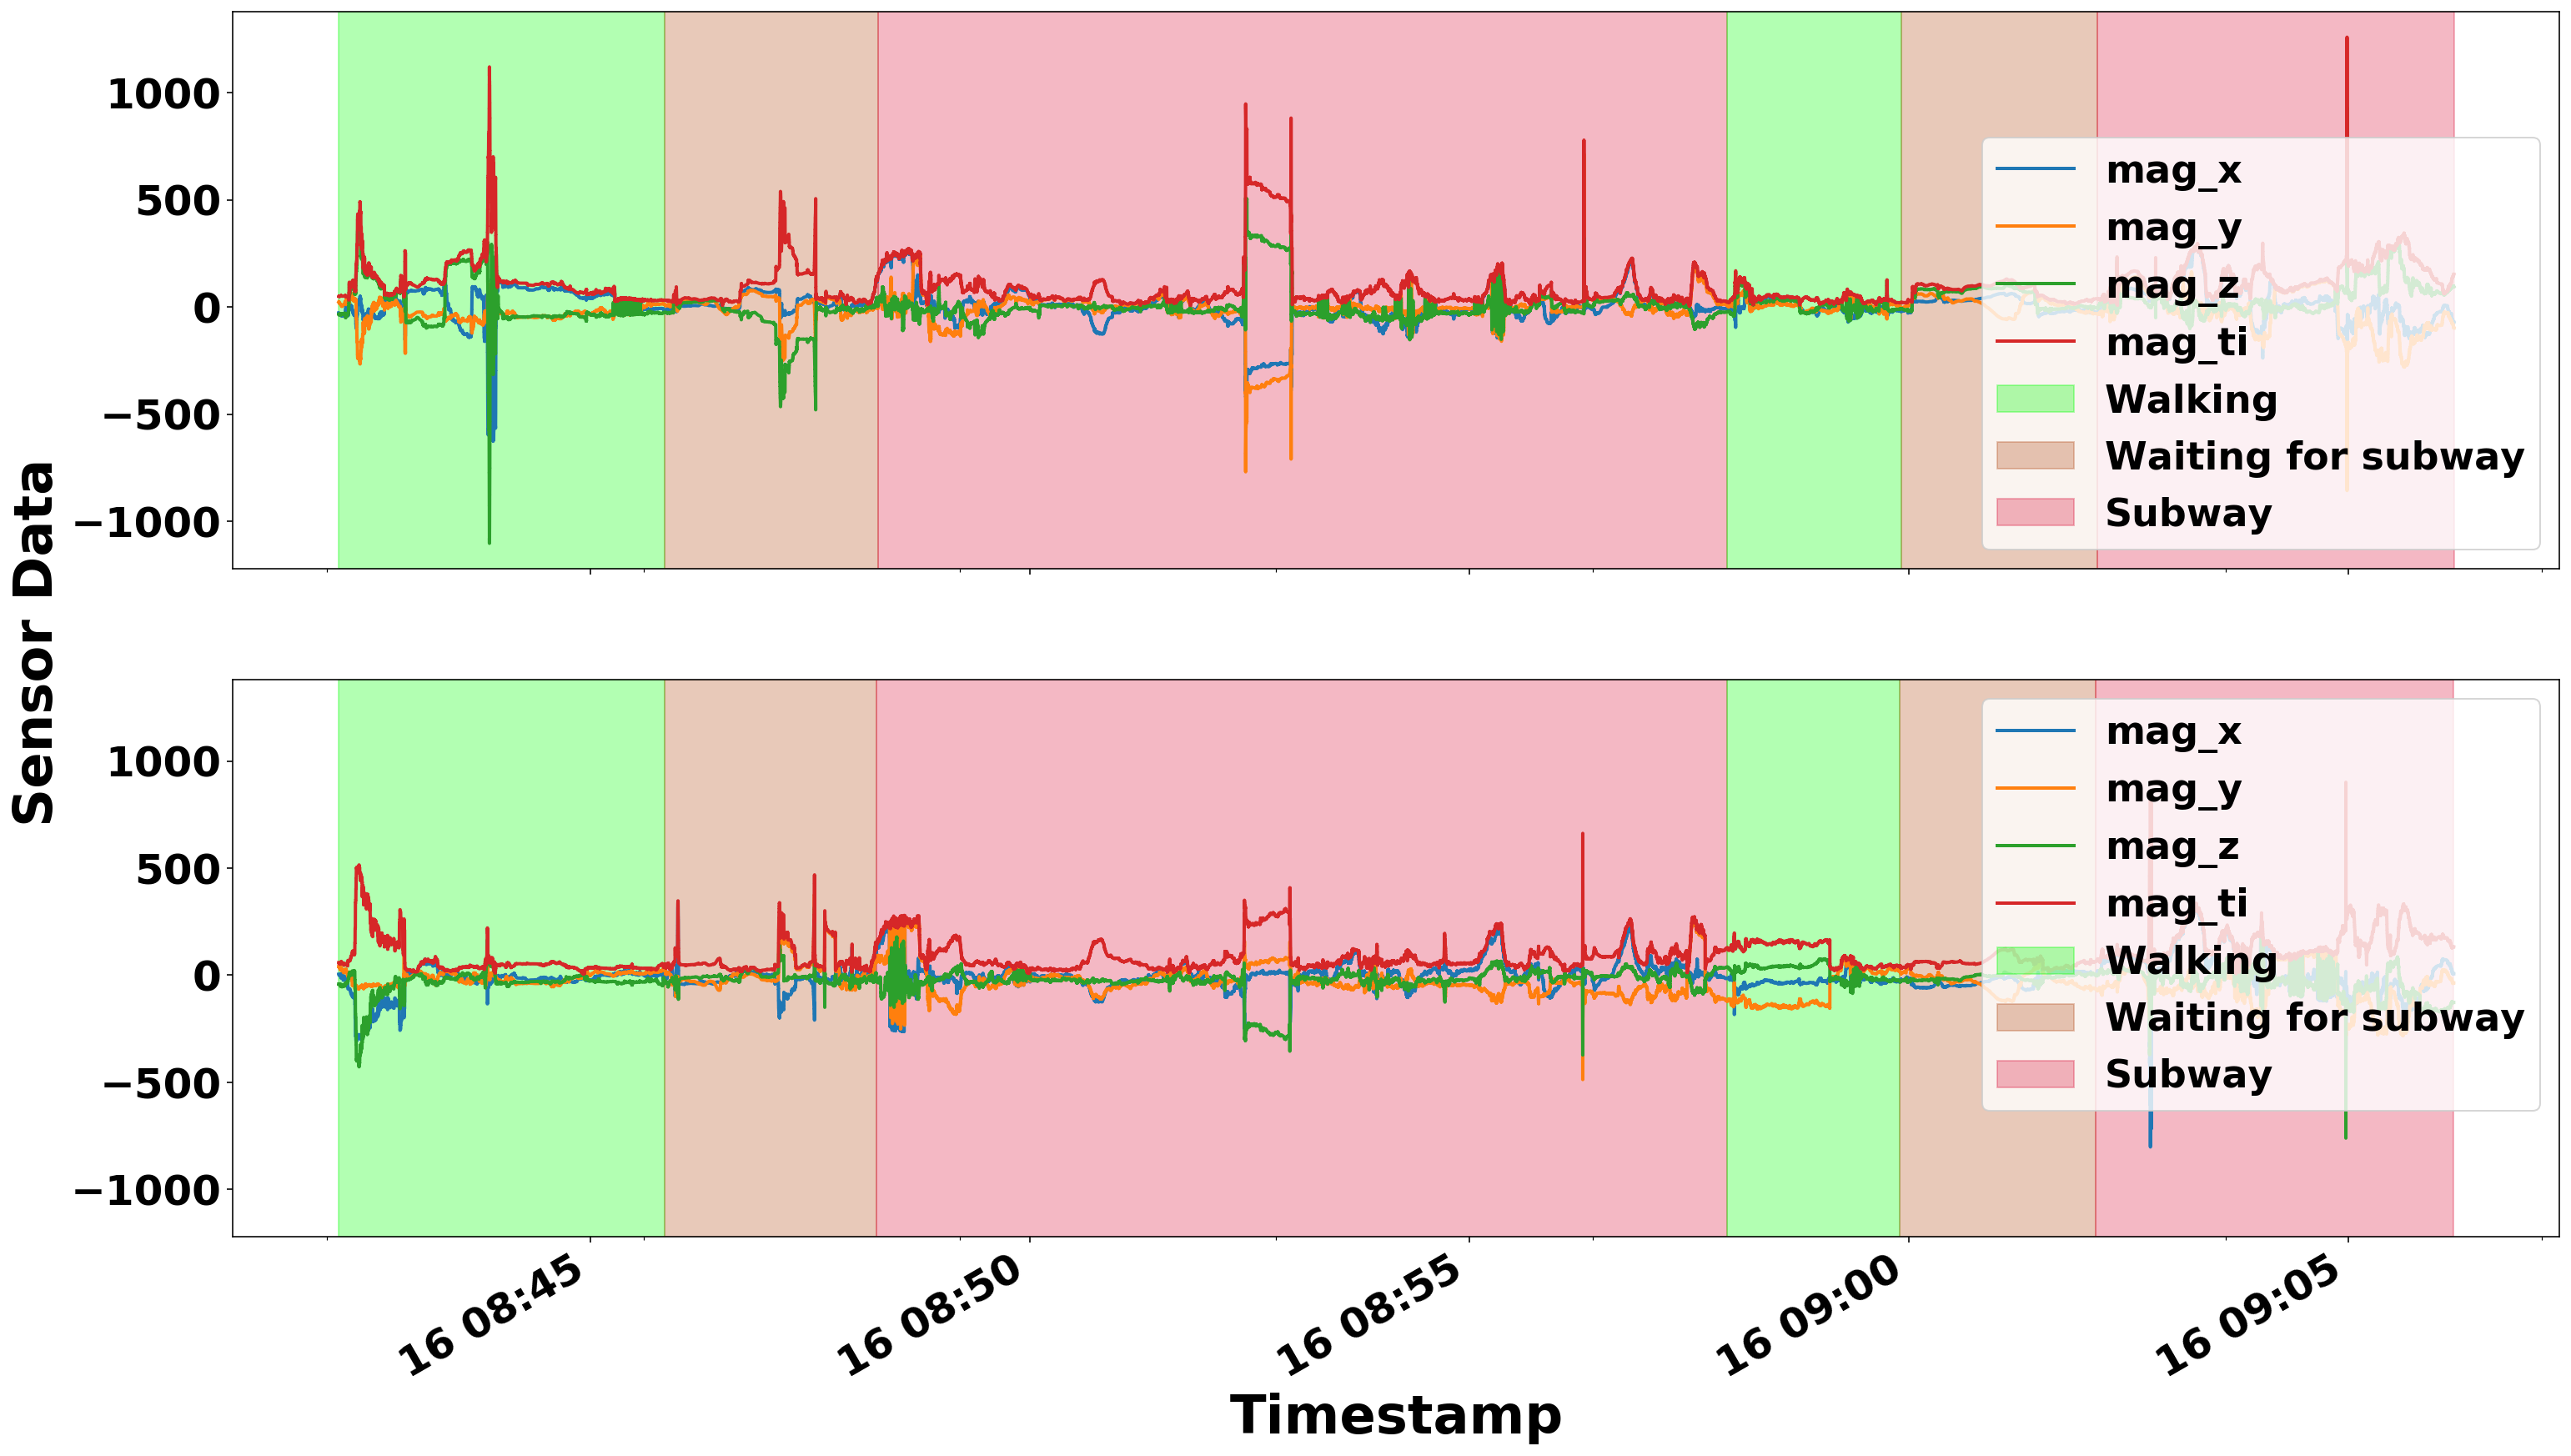

In [7]:
data_plotting.plot_data_comp(data_1["2020-07-16 08:42:08":"2020-07-16 09:06:11"][['mag_x','mag_y','mag_z','mag_ti', 'activity']], 
                             data_2["2020-07-16 08:42:08":"2020-07-16 09:06:11"][['mag_x','mag_y','mag_z','mag_ti', 'activity']],
                             'Timestamp', 'Sensor Data', 23, 'E8508BDFF2AE-F4428F5EB41D',
                             '(paper)20200716_174206-20200716_174205_st_1ti(ds)', True)

# Result Plot

In [8]:
from train import Train

Device mapping:
/job:localhost/replica:0/task:0/device:GPU:0 -> device: 0, name: GeForce RTX 2080 Ti, pci bus id: 0000:01:00.0, compute capability: 7.5



In [9]:
window = 480

train = Train(None, None)
autoencoder, encoder, decoder, history = train.model_ae_load('model1_ae/20200716_085000-20200716_085500', '0p001')

Model: "autoencoder"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
input_1 (InputLayer)         [(None, 480)]             0         
_________________________________________________________________
dense (Dense)                (None, 60)                28860     
_________________________________________________________________
dense_1 (Dense)              (None, 10)                610       
_________________________________________________________________
dense_2 (Dense)              (None, 60)                660       
_________________________________________________________________
dense_3 (Dense)              (None, 480)               29280     
Total params: 59,410
Trainable params: 59,410
Non-trainable params: 0
_________________________________________________________________


### MSE loss during training

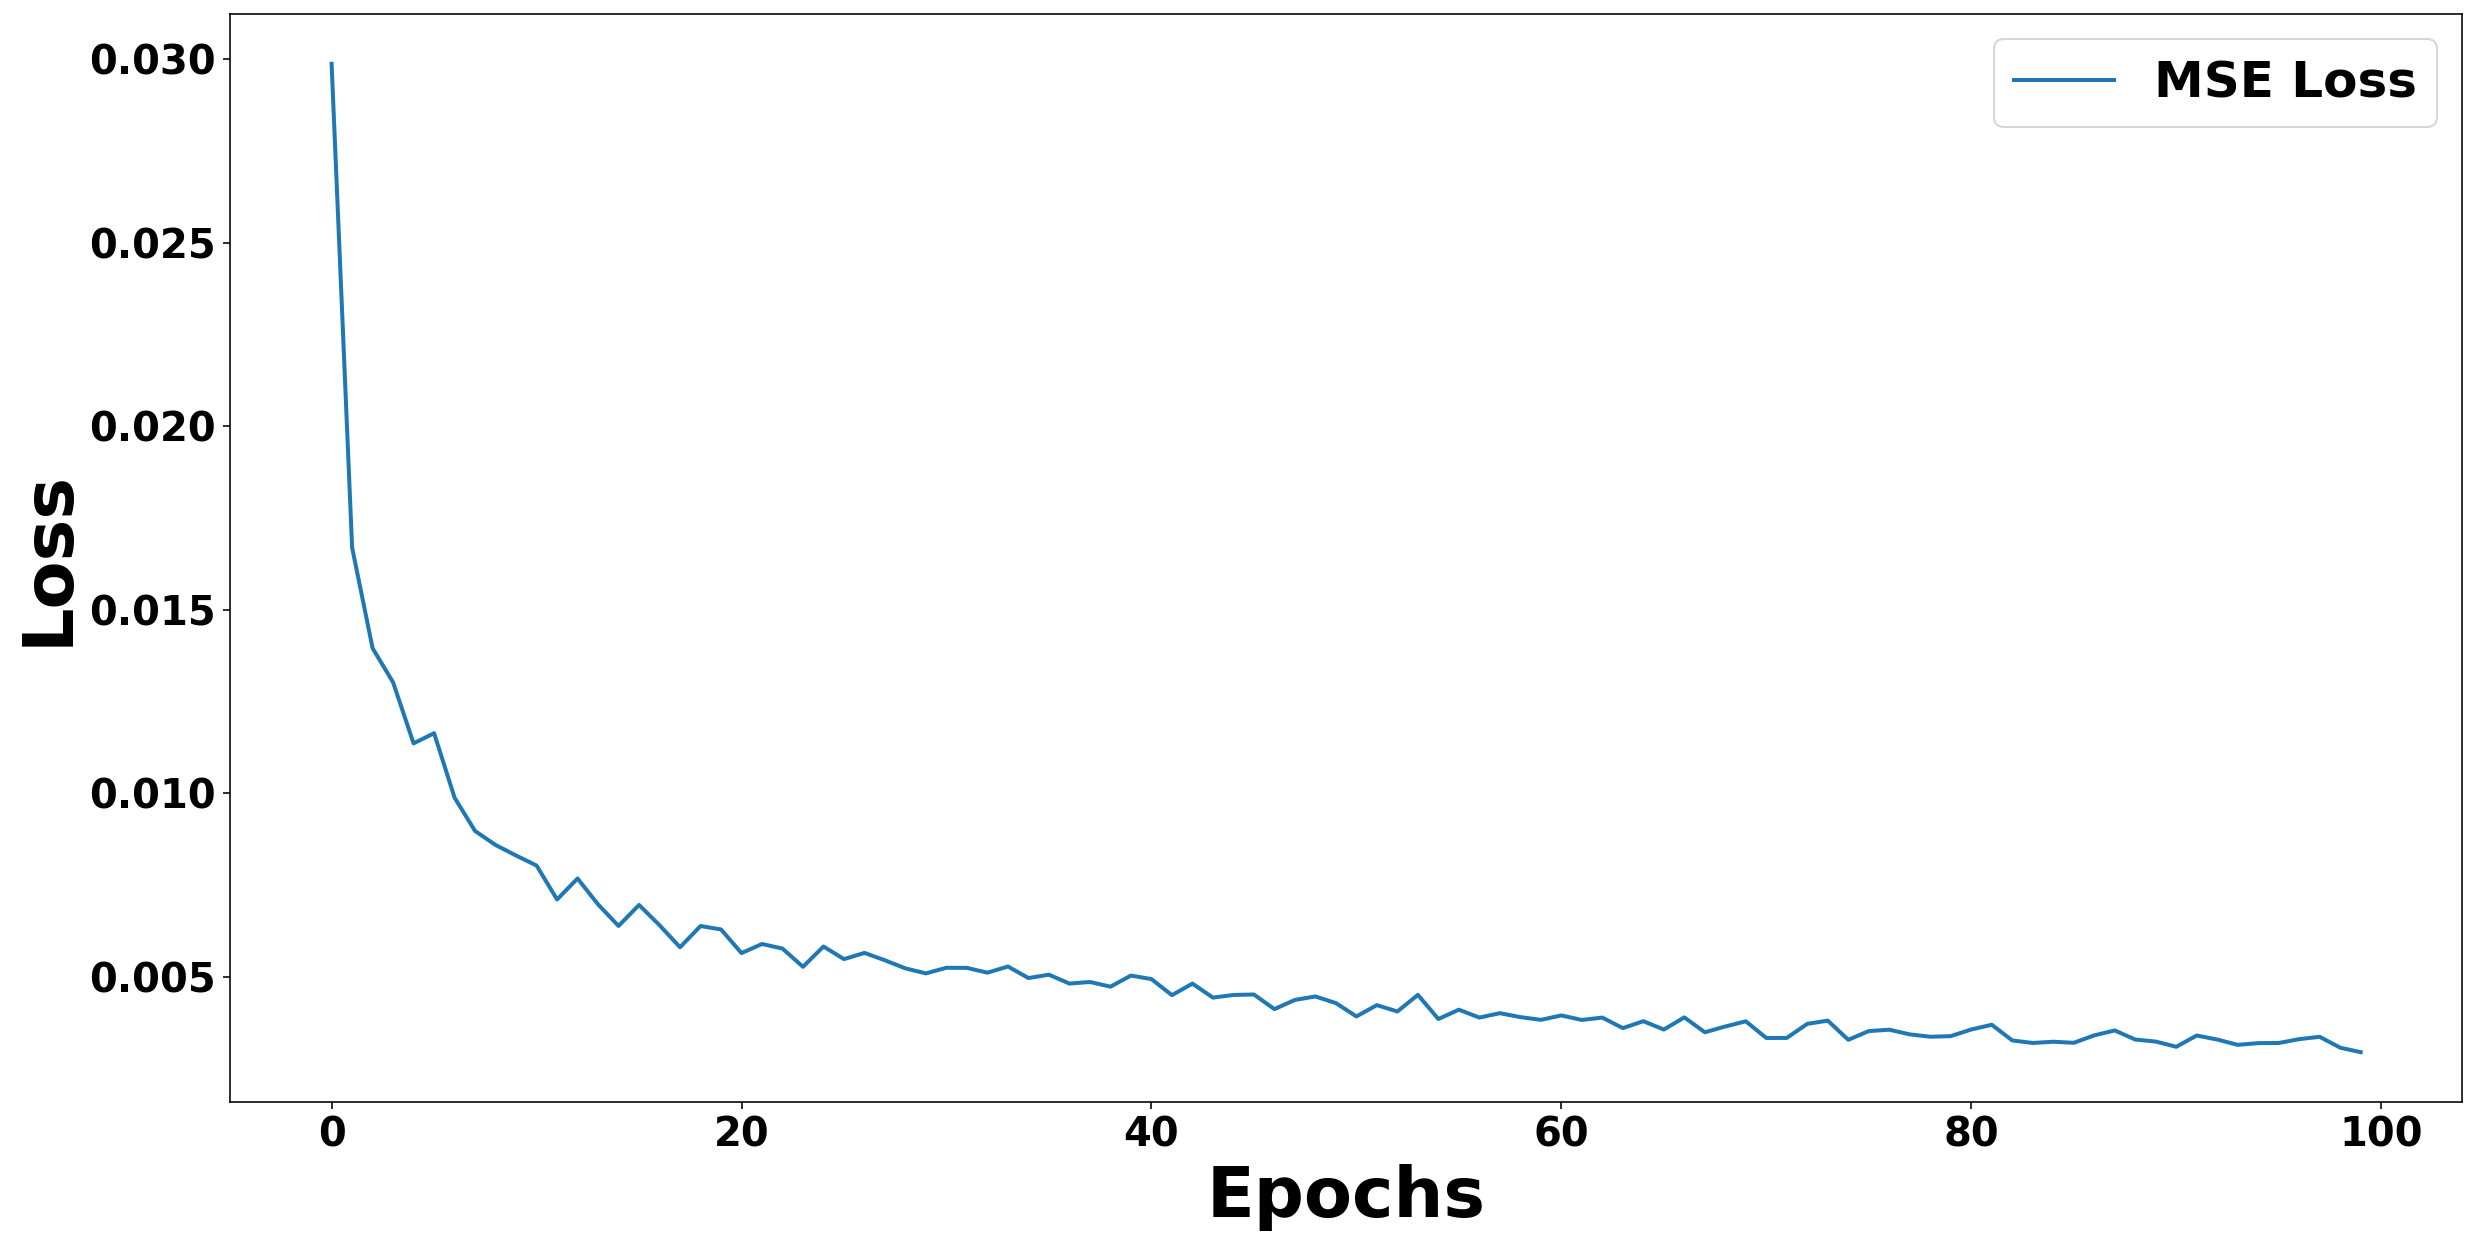

In [10]:
parent_dir = 'model1_ae/20200716_085000-20200716_085500'
directory = '0p001'
dir_name = './models/' + parent_dir + '/' + directory + '/'

history_dict = history
loss_values = history_dict['loss']
hist_plot = pd.DataFrame({'MSE Loss': loss_values})

data_plotting.plot_hist_save(hist_plot, 'Epochs', 'Loss', 25, dir_name, '(paper)loss_history', True)

### Test data reconstructing result when the two devices were in the same location

In [11]:
data_1, data_2 = data.downsampling('250ms')
data_1, data_2 = data.normalise(1)

data_test = data_2["2020-07-16 08:50:00":"2020-07-16 08:52:00"][['mag_ti_norm']].values
data_test = data_test[0:window]
data_test = data_test.reshape(1,len(data_test))

print(data_test.shape)
# print('\n', data_test)

(1, 480)


In [12]:
latent_vector = encoder.predict(data_test)
reconstructed_data = decoder.predict(latent_vector)
mse = mean_squared_error(data_test, reconstructed_data)

print('MSE test data (data_2) : ', mse)

MSE test data (data_2) :  0.0018599659605429391


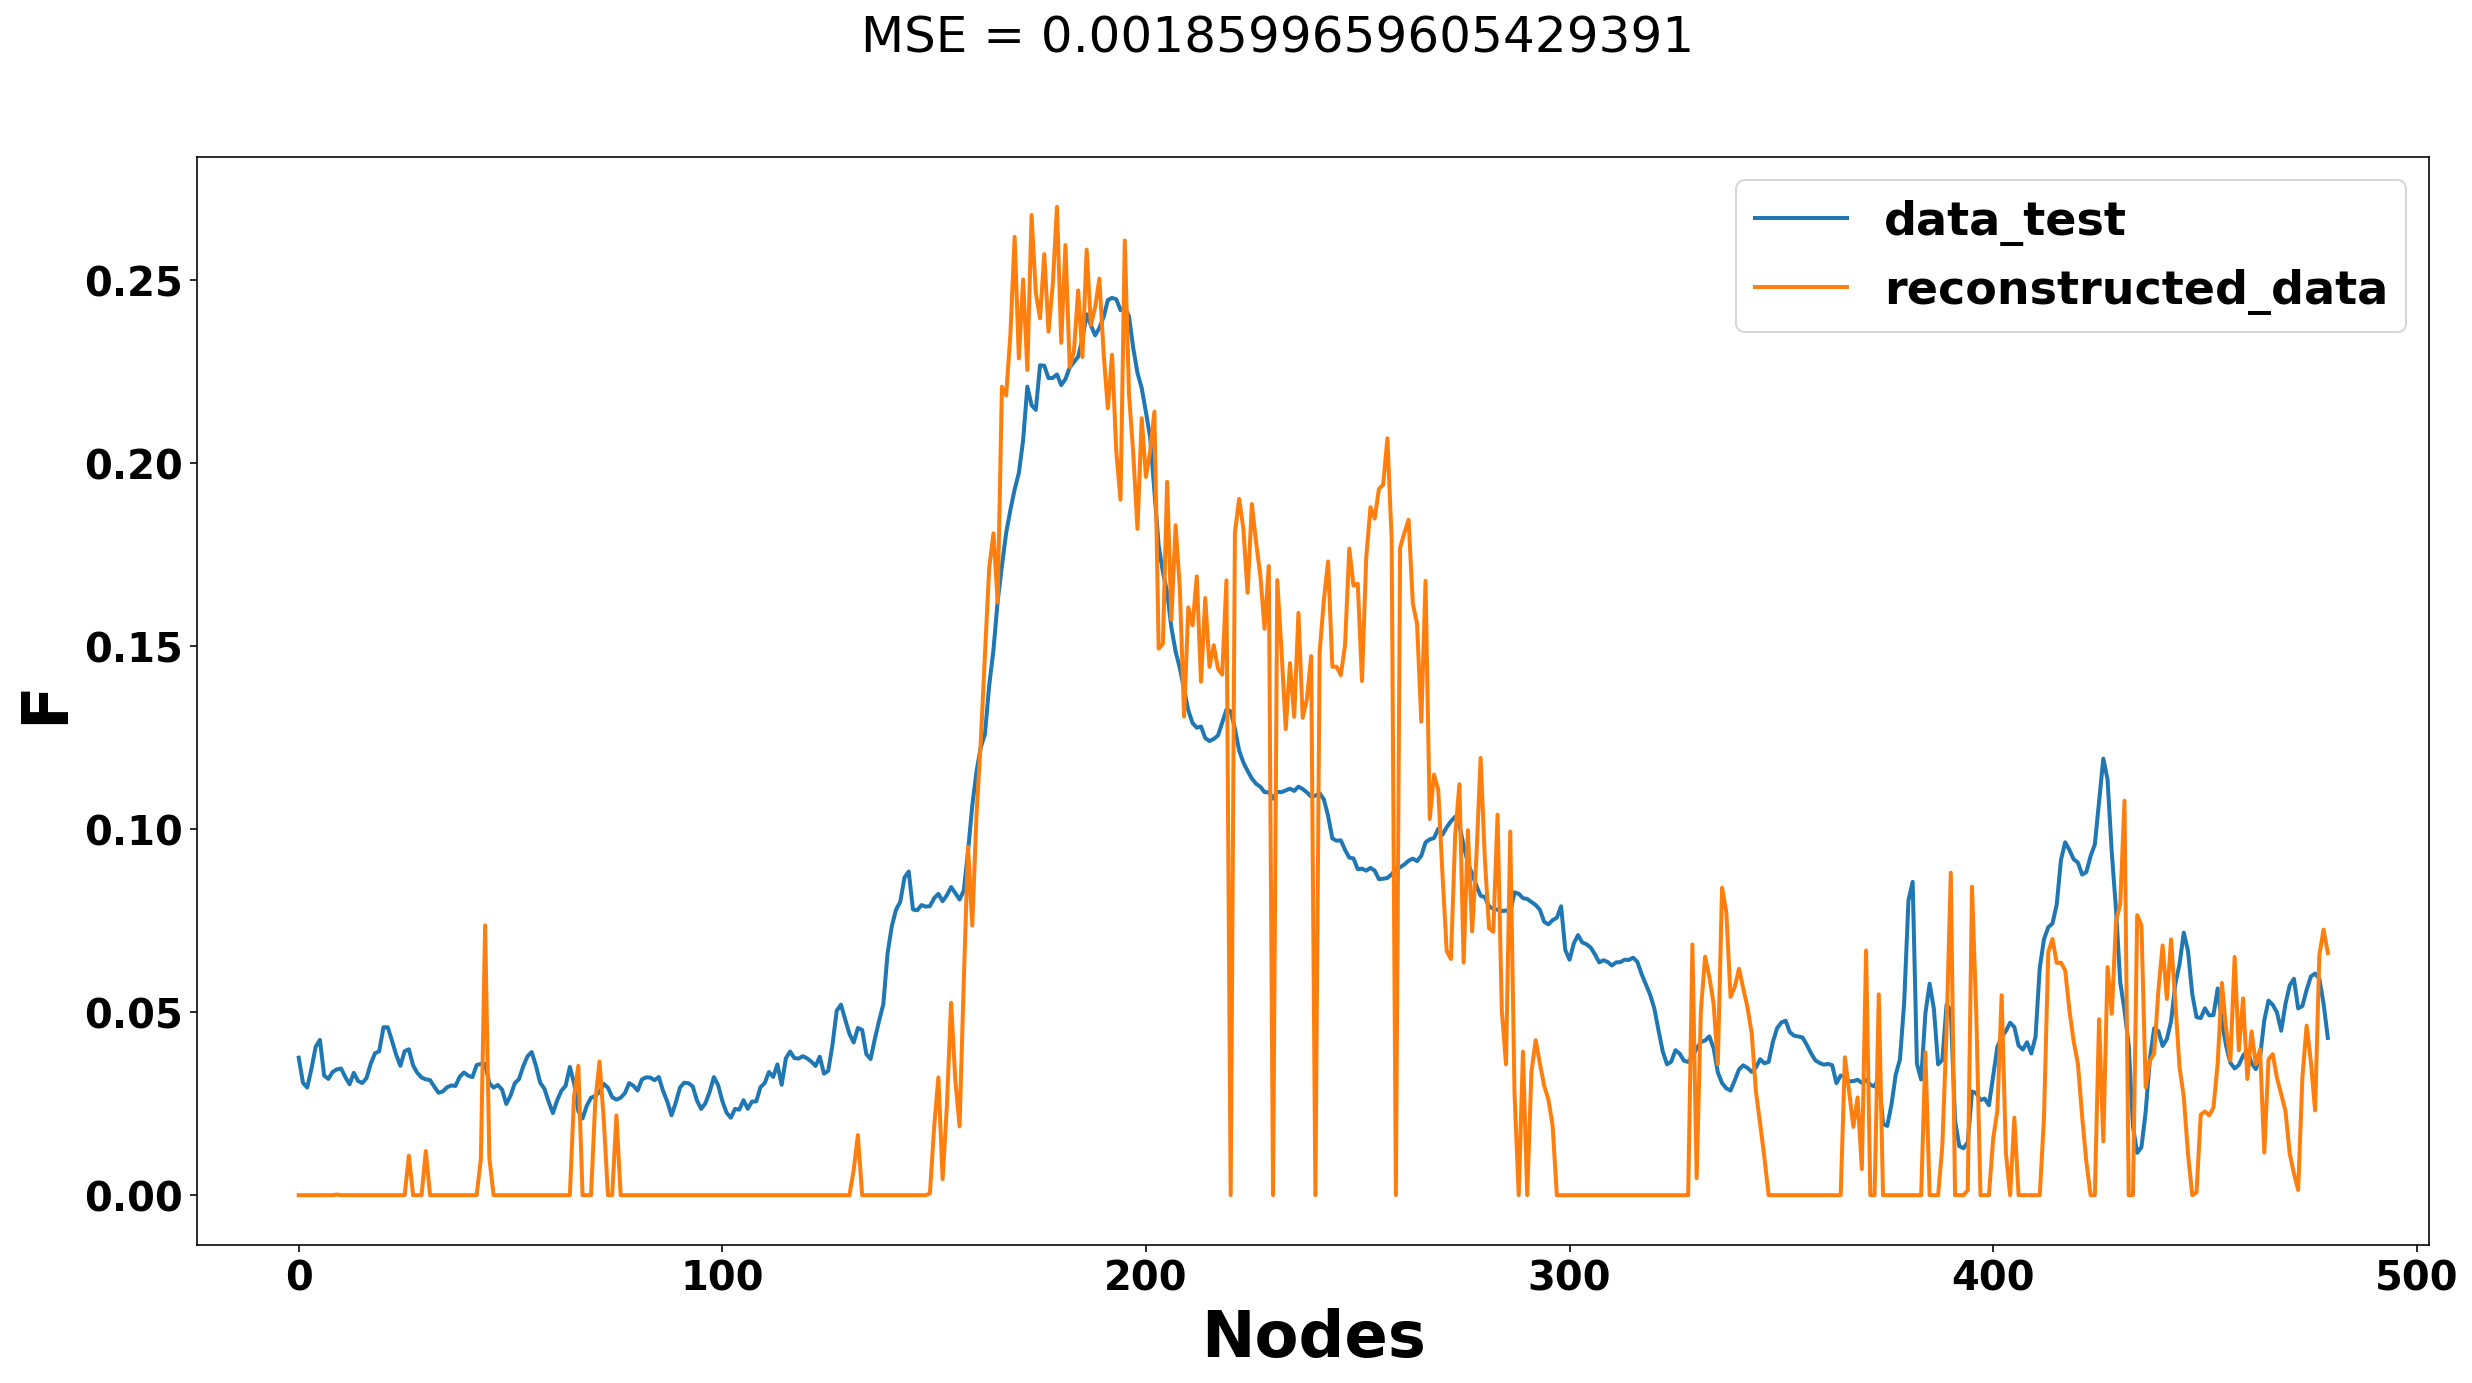

In [13]:
result_plot = pd.DataFrame({'data_test': data_test[0], 'reconstructed_data': reconstructed_data[0]})
data_plotting.plot_result(result_plot, 'Nodes', 'F', 23, 
                          'model1_ae/20200716_085000-20200716_085500', '0p001', '(paper)same_location', mse)

### Test data reconstructing result when the two devices were in different location

In [14]:
data_test_false = data_2["2020-07-16 09:02:00":"2020-07-16 09:04:00"][['mag_ti_norm']].values
data_test_false = data_test_false[0:window]
data_test_false = data_test_false.reshape(1,len(data_test_false))

print(data_test_false.shape)

(1, 480)


In [15]:
latent_vector_2 = encoder.predict(data_test_false)
reconstructed_data_false = decoder.predict(latent_vector_2)
mse_false = mean_squared_error(data_test_false, reconstructed_data_false)

print('MSE test data (data_2) : ', mse_false)

MSE test data (data_2) :  0.03410131135952718


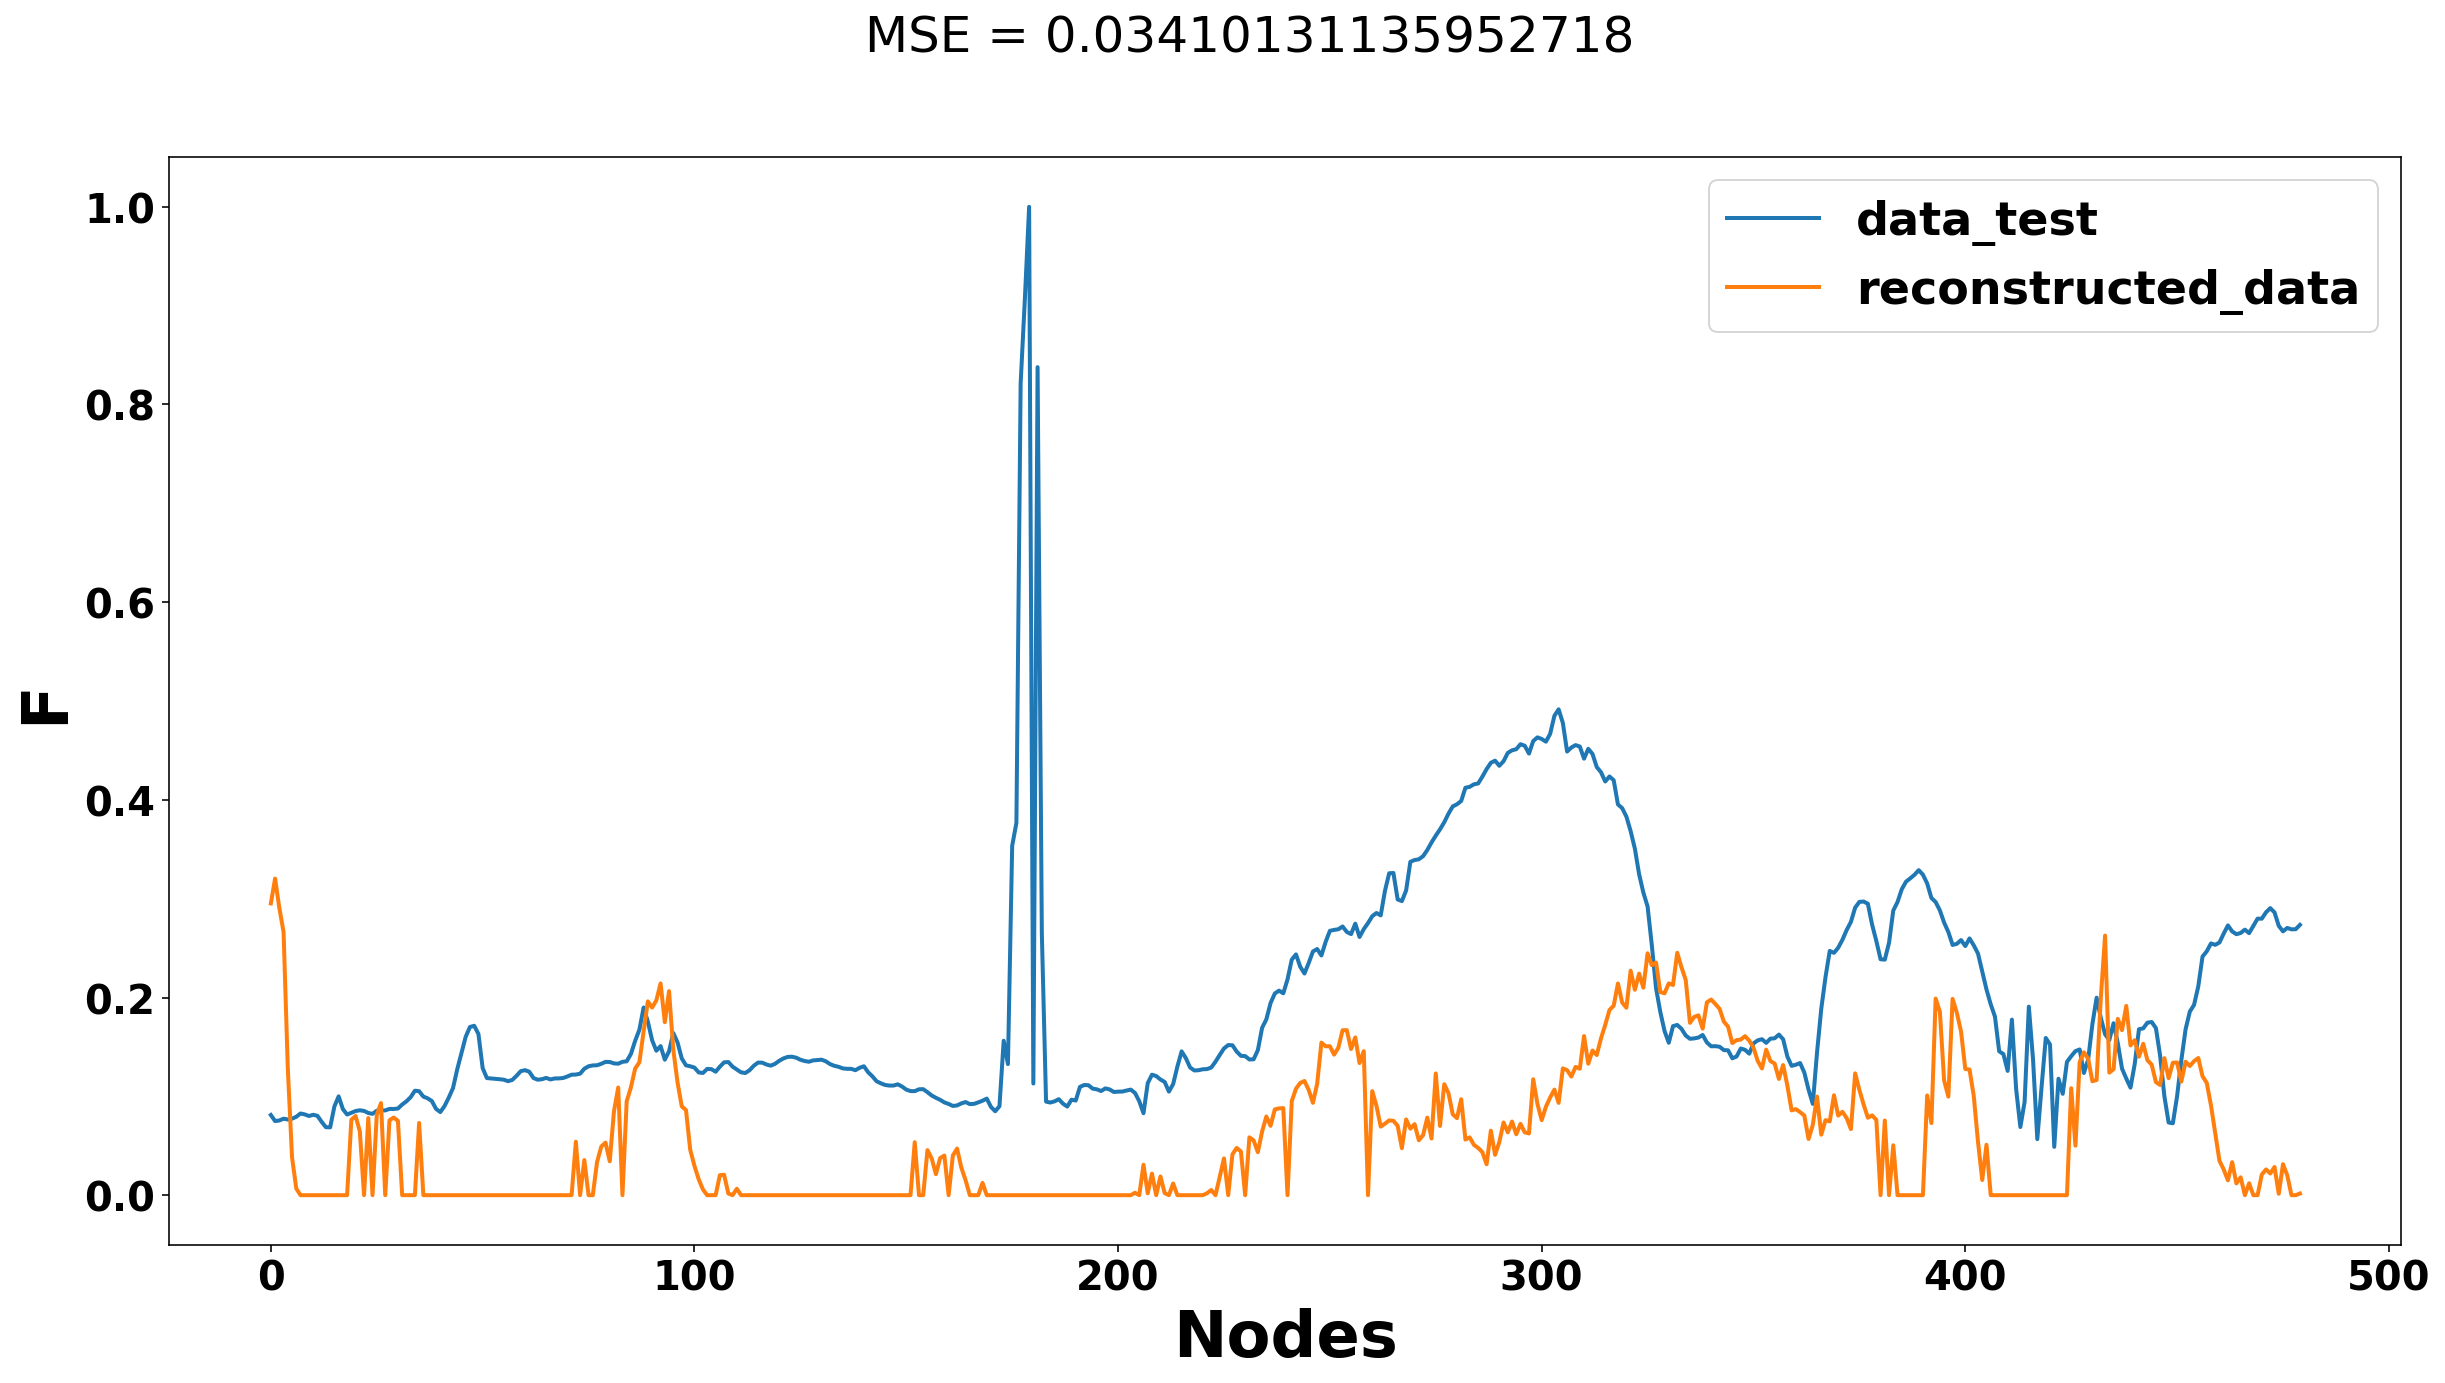

In [16]:
result_plot_false = pd.DataFrame({'data_test': data_test_false[0], 'reconstructed_data': reconstructed_data_false[0]})
data_plotting.plot_result(result_plot_false, 'Nodes', 'F', 23,
                          'model1_ae/20200716_085000-20200716_085500', '0p001', '(paper)different_location', mse_false)